# Video Game Analysis

In this notebook, we take the video games dataset and perform exploratory data analysis using the pandas library of Python. The EDA is a means to learn more about the video game sales over the years, the rise and fall of key markets, and changes in genre preferences. We are also going to plot some of the data to get a better picture of what the data is saying using Python's Seaborn library. Ultimately, we seek to draw some fundamental conclusions about the data which can enable us with a sufficient understanding of the data to dig deeper with the help of more complex methods of analysis.

In [16]:
#Import the libraries that support the functionalities we require for analysis 
import numpy as np
import pandas as pd
import seaborn as sns

## Getting the data

Our first step towards getting a sense of the data is to understand just how many video games have been sold, what are the most popular video games, and all the summary statistics, such as the the min, max, and median of global sales. 

In [17]:
# Extracting the dataset into a pandas dataframe

gamesData = pd.read_csv(r'videogamesales.csv')

The first thing to find out now that we have our data on python is -
1. What is the total number of video games for which we have data and,
2. What are the top 15 games by rank? 

In [18]:
print("The total number of video games in the dataset: ", str(len(gamesData)))
print("The top 15 video games are: ")
gamesData.iloc[0:16, :]

The total number of video games in the dataset:  16598
The top 15 video games are: 


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47


We have data of the sales by region for each video game but it definitely helps to also know the global sales numbers as well.
So let's add that information to the data frame so it's readily available to us at a glance for further analysis.

In [19]:
#Adding global sales data to the data frame using regional sales data

gamesData['Global_Sales'] = gamesData['NA_Sales'] + gamesData['EU_Sales'] + gamesData['JP_Sales'] + gamesData['Other_Sales']

Now, let's take a look at the top 15 games in the updated data frame

In [20]:
# gamesData.iloc[0:16, :]

Descriptive statistics give us a snapshot about the numbers in our data. So let's get that information.

In [21]:
print(gamesData['Global_Sales'].describe())
print("Proportion of games released in 2000 and after that generated more than $5 million in sales: %.3f" %(100*(len(gamesData[(gamesData['Year'] >= 2000) & (gamesData['Global_Sales'] >= 5.0)])/len(gamesData))))

count    16598.000000
mean         0.537164
std          1.555151
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64
Proportion of games released in 2000 and after that generated more than $5 million in sales: 0.934


The descriptive statistics give a lot of insights like,
1. There are games which did not generate any revenue!
2. Games have been able to generate as high as 82.7 million USD in global sales
3. The average revenue from global sales is 0.5 million USD

And finally, out of 16K+ games in this dataset, only around 1% of them that were released in 2000 or later earned $5 million or more. This number shows that maybe, it is very difficult for a video game to be globally successful. But of course, we need to inspect further to learn more about the video games sales.

## How do we know which games were successful in a specific category?

Since we would like to learn about which games performed well based on different sets of critera, we shall define a general purpose function which will return a dataframe filtered by the category and corresponding value that we are interested in.

In [22]:
#Defining a function which will return a dataframe filtered by the category that we want to inspect

def filter_df(df, category = None, value = None, n = 10, sort_category = 'Global_Sales'):
    if category == None and value == None:
        return df.iloc[:n, :].sort_values(by = sort_category, ascending = False)
    else:
        return df[df[category] == value].iloc[:n, :].sort_values(by = 'Global_Sales', ascending = False)

### What are the top five overall sellers?

In [23]:
filter_df(gamesData, n = 5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


### What are the top 10 Wii sellers?

In [24]:
filter_df(gamesData, 'Platform', 'Wii')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
48,49,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27


### What are the top five selling puzzle games?

In [25]:
filter_df(gamesData, 'Genre', 'Puzzle', 5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
155,156,Tetris,NES,1988.0,Puzzle,Nintendo,2.97,0.69,1.81,0.11,5.58
170,171,Dr. Mario,GB,1989.0,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34


### What are the top 10 selling games in the year 1990?

In [26]:
filter_df(gamesData, 'Year', 1990)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62
215,216,Dr. Mario,NES,1990.0,Puzzle,Nintendo,2.62,0.60,1.52,0.10,4.84
391,392,F-1 Race,GB,1990.0,Racing,Nintendo,1.73,0.69,0.59,0.40,3.41
446,447,Dragon Warrior IV,NES,1990.0,Role-Playing,Enix Corporation,0.08,0.00,3.03,0.01,3.12
509,510,F-Zero,SNES,1990.0,Racing,Nintendo,1.37,0.51,0.89,0.07,2.84
588,589,Streets of Rage,GEN,1990.0,Action,Sega,1.86,0.55,0.11,0.08,2.60
722,724,Teenage Mutant Ninja Turtles II: The Arcade Game,NES,1990.0,Action,Konami Digital Entertainment,1.74,0.25,0.21,0.03,2.23
1190,1192,Final Fight,SNES,1990.0,Action,Capcom,0.67,0.17,0.69,0.03,1.56
1278,1280,Nintendo World Cup,NES,1990.0,Sports,Nintendo,0.28,0.50,0.65,0.05,1.48
1385,1387,Final Fantasy III,NES,1990.0,Role-Playing,SquareSoft,0.00,0.00,1.39,0.01,1.40


## Study of the correlation between sales in each region 

It is important to understand how a game has performed in different regions to learn where the game, the respective genre, and other related parameters have more reach globally.

For this reason, we'll build a correlation matrix to study how sales in each region are related to the game's global sales.

### For the overall dataset

In [27]:
# Getting the correlation matrix for the overall dataset

gamesData[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()['Global_Sales'][:4]

NA_Sales       0.941050
EU_Sales       0.902839
JP_Sales       0.611821
Other_Sales    0.748351
Name: Global_Sales, dtype: float64

From this correlation matrix, three things are clear -
1. Global sales, obviously, has a positive correlation with sales figures in all other regions
2. Global sales has the highest positive correlation with sales in the North American region
3. Global sales has a positive correlation with sales in Japan which is close to 2/3rds of that of both sales in North America and sales in EU.


This means that, on average, -
1. A game's global success can be determined by how well it does in the North American region and vice versa
2. Japan, a single country, is one of the largest markets for video games when compared to entire regions.

### How did games do in different regions in the year 2000?

In [28]:
# Getting the correlation matrix for the year 2000

gamesData[gamesData['Year'] == 2000][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()['Global_Sales'][:4]

NA_Sales       0.900914
EU_Sales       0.866584
JP_Sales       0.512328
Other_Sales    0.762164
Name: Global_Sales, dtype: float64

### What about 15 years later?

In [29]:
# Getting the correlation matrix for the year 2015

gamesData[gamesData['Year'] == 2015][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()['Global_Sales'][:4]

NA_Sales       0.911533
EU_Sales       0.922360
JP_Sales       0.307129
Other_Sales    0.956571
Name: Global_Sales, dtype: float64

Observations from the above correlation matrices-

1. Correlation between North America's sales and EU's sales with the global sales has been steady, if not slightly increased over the period of 15 years
2. Correlation between sales in Japan and the global sales has decreased by 0.2 from 2000 to 2015.
3. Correlation between other region's sales and global sales has increased from 0.76 to 0.95 over 15 years

We can infer that -
1. North America and EU are steady markets for video games 
2. Japan's consumption of video games has reduced over the years - This fall may be due to the the relatively low youth population in Japan as of 2015  
3. Countries other than Japan, USA, Canada, and those in EU, have begun to buy more video games - This could be attributed to cheaper internet prices and surge in mobile phone usage in 2015 when compared to 2000  

## Has there been a shift in genre preference over the years?

Which genres were more popular in the year 2000? Are they still popular 15 years later?

We can find out by looking at box plots that compare the global sales in 2000 and 2015 for each genre. 

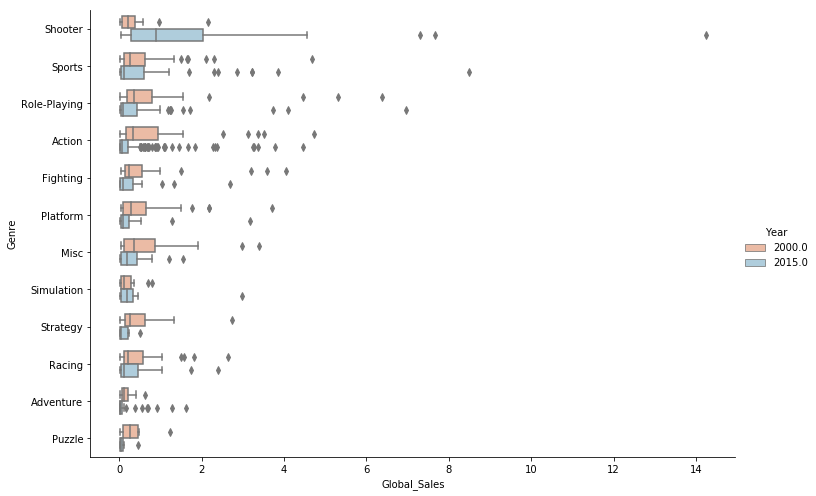

In [30]:
#Creating a box plot to show how games of different genres have sold between 2000 and 2015 

sns.catplot(
    data=gamesData[(gamesData['Year'] == 2000) | (gamesData['Year'] == 2015)],
    x='Global_Sales',
    y='Genre',
    hue='Year',
    kind='box',
    palette='RdBu',
    height=7,
    width = 0.7,
    aspect=1.5)

This plot shows the transition in preference for different genres in video games over the years -

1. The 'Shooter' genre has pretty much exploded in 15 years with it dominating the video game industry by a significant margin as of 2015
2. The market for sports video games like FIFA and NBA has stayed steady over the years
3. Genres like 'Role-Playing', 'Platform', and 'Strategy' which had a relatively strong market in 2000 have diminished signficantly in 15 years.

# Conclusions

With mammoth advancements in game design and technology, the video game industry has evolved significantly in as short a period as 15 years.

While strategy, role-playing, and action were preferred genres just a decade ago, games like Counter Strike, Call of Duty, as well as PUB-G and Fortnite have enabled the shooter genre to pretty much gain a monopoly on the video games market globally. 

This rise has been bolstered by the exponentially increasing popularity of massively multiplayer online (MMO) games amongst people in not just North America, Europe, and Japan but also developing countries with huge youth populations like India, China, and Pakistan through cheap internet and affordable smart phones with powerful processors.

Video games which were earlier deemed a means of recreation have now become a billion-dollar industry with important investors across the world putting their money in it. It is no more a way to pass time but rather has become a serious profession for many young men and women with gamers like 'Pewdiepie' gaining worldwide fame and millions of dollars from live-streaming their gameplays online.